In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-website-users/users.csv


(1097, 4)


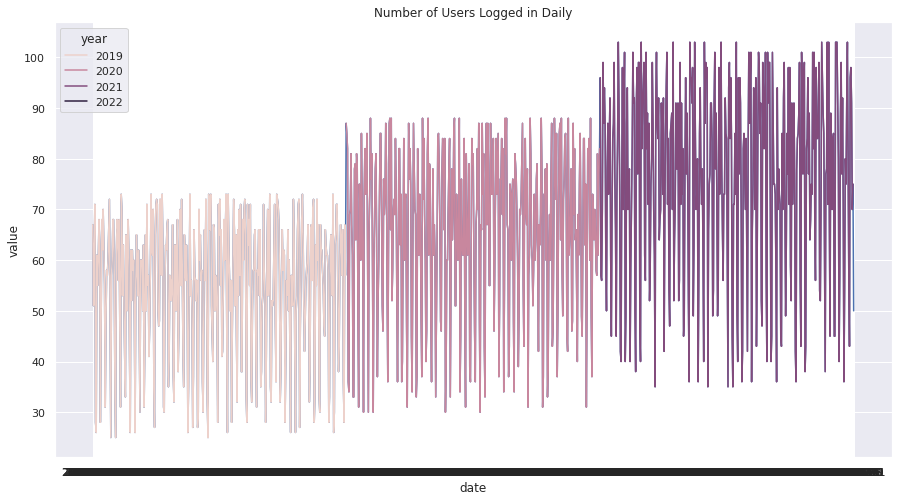

In [2]:
import seaborn as sns
import statsmodels as sm

Dailywebdf =  pd.read_csv('/kaggle/input/daily-website-users/users.csv')
print(Dailywebdf.shape)
Dailywebdf.head()
sns.set(rc={"figure.figsize":(15,8)})
plt1=sns.lineplot(data=Dailywebdf,x='date',y='value').set(title="Number of Users Logged in Daily(2019-2022)")
plt1
Dailywebdf['date1']=pd.to_datetime(Dailywebdf['date'],errors='coerce')
Dailywebdf['year']=Dailywebdf['date1'].dt.year
Dailywebdf['month']=Dailywebdf['date1'].dt.month
Dailywebdf['day']=Dailywebdf['date1'].dt.day
plt2=sns.lineplot(data=Dailywebdf,x='date',y='value',hue='year').set(title="Number of Users Logged in Daily")

Yearly increase in number of users that are logging in

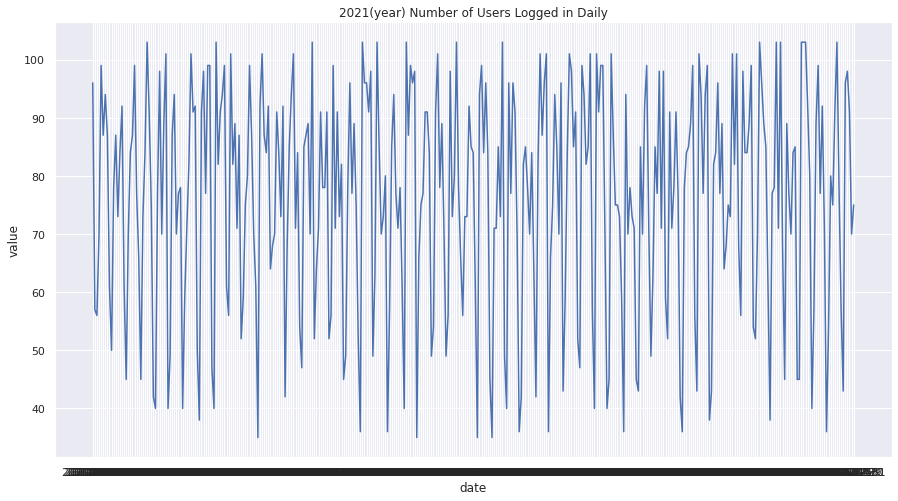

In [3]:
Dailywebdf1=Dailywebdf[(Dailywebdf['year']==2021)].reset_index().drop(columns=['Unnamed: 0','index'])
Dailywebdf2=Dailywebdf[(Dailywebdf['year']==2019)].reset_index().drop(columns=['Unnamed: 0','index'])
Dailywebdf3=Dailywebdf[(Dailywebdf['year']==2020)].reset_index().drop(columns=['Unnamed: 0','index'])
plt2=sns.lineplot(data=Dailywebdf1,x='date',y='value').set(title="2021(year) Number of Users Logged in Daily")

statsmodel version= 0.13.2 
 Yearly Mean Users login 
    Year       Mean
0  2019  54.405479
1  2020  65.453552
2  2021  76.164384


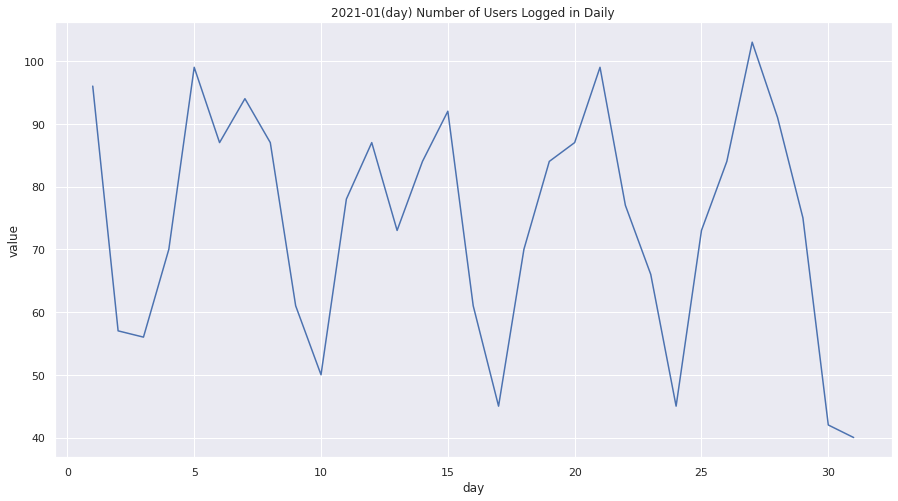

In [4]:
descript_21=Dailywebdf1['value'].describe()
descript_19=Dailywebdf2['value'].describe()
descript_20=Dailywebdf3['value'].describe()
Dailywebdf1_month=Dailywebdf[(Dailywebdf['year']==2021)&(Dailywebdf['month']==1)].reset_index().drop(columns=['Unnamed: 0','index'])
Mean = pd.DataFrame({'Year':[2019,2020,2021],'Mean':[descript_19['mean'],descript_20['mean'],descript_21['mean']]})
plt3=sns.lineplot(data=Dailywebdf1_month,x='day',y='value').set(title="2021-01(day) Number of Users Logged in Daily")
print('statsmodel version=',sm.__version__,'\n','Yearly Mean Users login','\n',Mean)

Yearly Graph for 2021 shows that there graph trends are in sinusodial wave kind graph.on plotting line graph for one month data ,data is distributed in sinusodial form.

<AxesSubplot:>

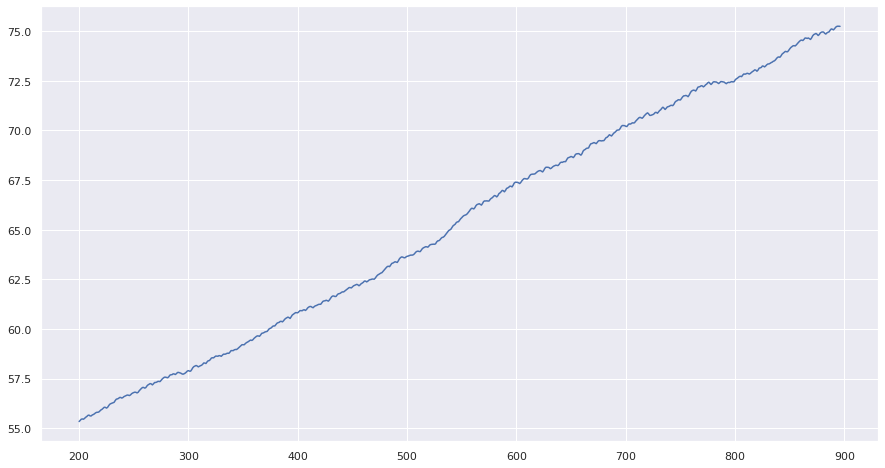

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

mul_dec = seasonal_decompose(Dailywebdf['value'],model='multiplicative',period=400)
add_dec = seasonal_decompose(Dailywebdf['value'],model='additive',period=400)
result_adf=adfuller(Dailywebdf['value'])
mul_dec.trend.plot()

<AxesSubplot:>

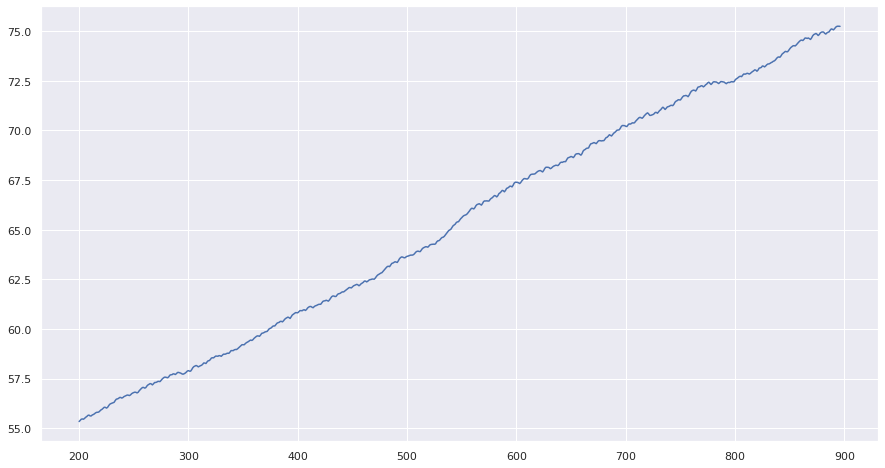

In [6]:
add_dec.trend.plot()

The Yearly Trend for multiplicative and additive decompose graph is in increasing order.

In [7]:
print("p-value=",result_adf[1])

p-value= 0.5584324818994373


The pvalue for augmentated dickey fuller test is not less than .05 hence we cannot reject the null and the values are non stationery and 1st differencing will be required.

In [8]:
Dailywebdf['diff1']=Dailywebdf['value'].diff()
Dailywebdf['diff1']=Dailywebdf['diff1'].fillna(0)

In [9]:
result_adf1=adfuller(Dailywebdf['diff1'])
print('p-value=',result_adf1[1])

p-value= 5.674175568009798e-26


The pvalue for augmentated dickey fuller test is less than .05 through 1st differencing hence we reject the null and the values are stationery.

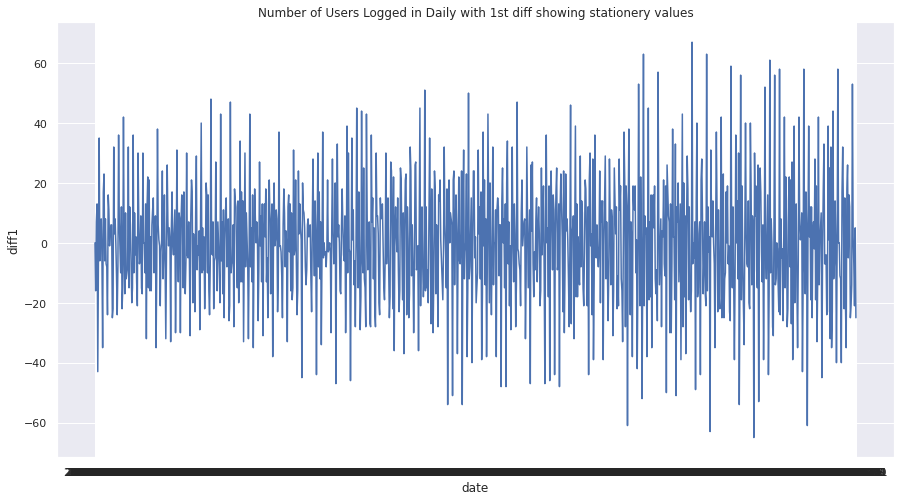

In [10]:
plt4=sns.lineplot(data=Dailywebdf,x='date',y='diff1').set(title="Number of Users Logged in Daily with 1st diff showing stationery values")

In [11]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

acf_values=acf(Dailywebdf['diff1'])
np.round(acf_values,2)#7 lags highest

array([ 1.  , -0.19, -0.3 , -0.01, -0.01, -0.3 , -0.  ,  0.64, -0.01,
       -0.32,  0.01, -0.02, -0.28, -0.03,  0.63,  0.  , -0.3 , -0.02,
        0.01, -0.32,  0.  ,  0.63, -0.01, -0.31,  0.  , -0.01, -0.3 ,
        0.01,  0.6 , -0.  , -0.31])

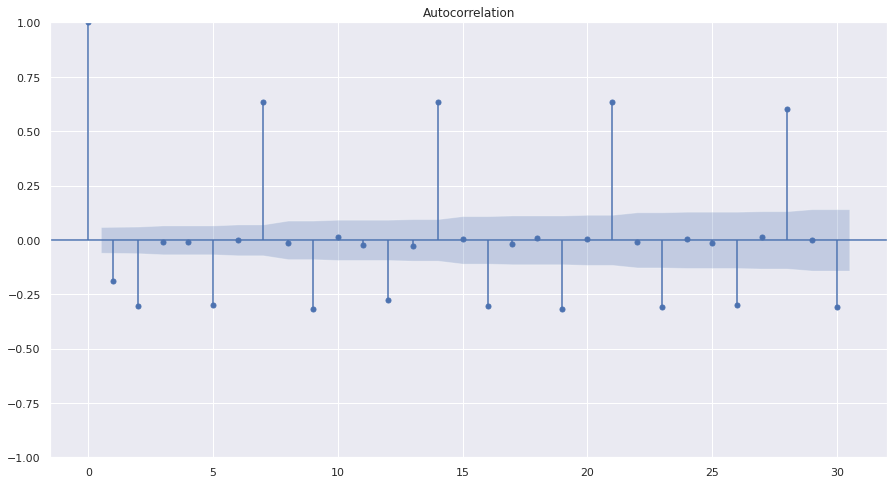

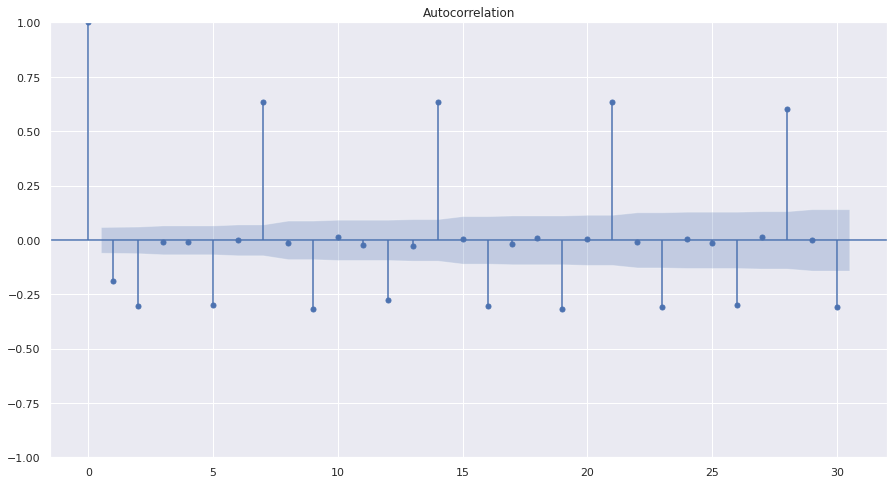

In [12]:
plot_acf(Dailywebdf['diff1'],lags=30)

AutoCoorelation function appearing as 7th lag highest.

In [13]:
pacf_values=pacf(Dailywebdf['diff1'])
np.round(pacf_values,2)

array([ 1.  , -0.19, -0.35, -0.18, -0.21, -0.54, -0.68, -0.1 ,  0.05,
       -0.05,  0.01,  0.04, -0.04, -0.39, -0.09,  0.  ,  0.02, -0.01,
        0.09, -0.06, -0.27, -0.  ,  0.03,  0.01,  0.04,  0.05, -0.02,
       -0.13,  0.  ,  0.03,  0.  ])

6 Lags negative coorelated,13 lag negative correlated

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


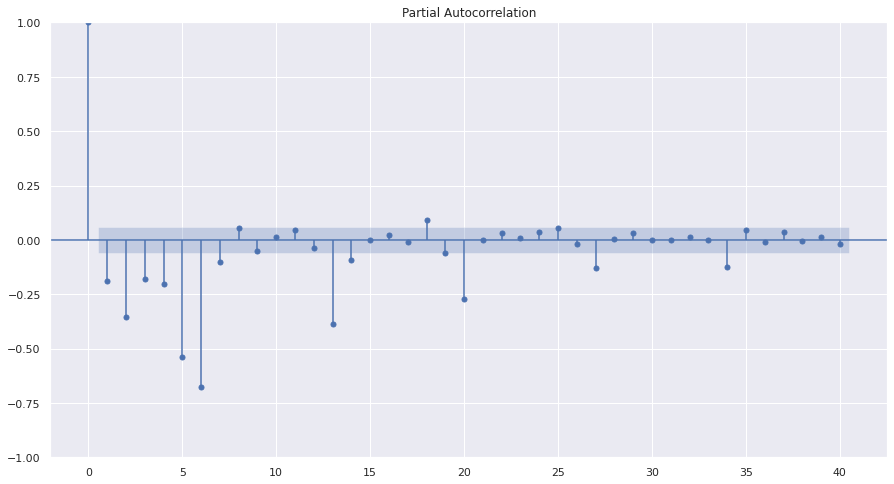

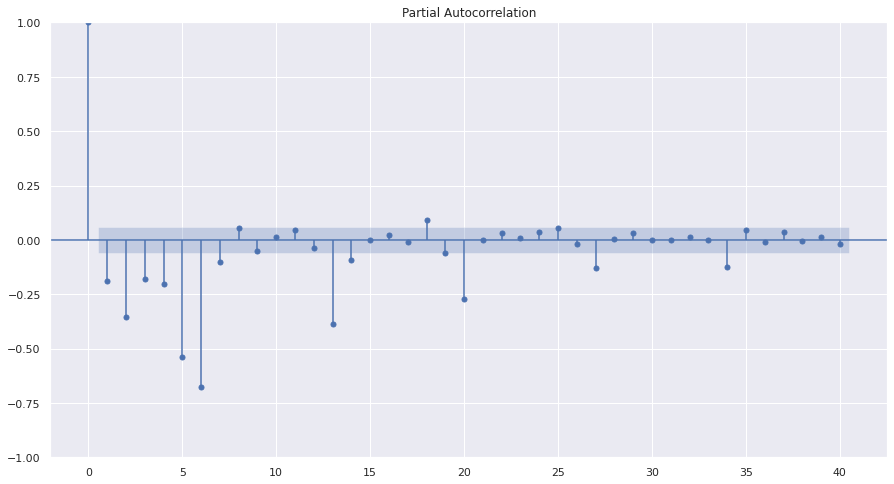

In [14]:
plot_pacf(Dailywebdf['diff1'],lags=40)

Partial Auto Corelation functions appearing in Negative postion for 6th lag and 13th lag.

ACF and PACF is found to be in 7th lag and negative 6th lags , acf for 7th lag is repetative so there can be occurrence of seasonality hence taking q value as 1.

In [15]:
df_splt=np.round(0.80*(len(Dailywebdf))).astype(int)
#training data 80% and test dataset 20%
Train_df=Dailywebdf[:df_splt]
Test_df=Dailywebdf[df_splt:]
print('Training Data total obs',Train_df.shape[0])
print('Testing Data total obs',Test_df.shape[0])

Training Data total obs 878
Testing Data total obs 219


In [16]:
from statsmodels.tsa.arima.model import ARIMA
#ACF = q ,PACF=P
q=1
d=1
p=4
model_test=ARIMA(Train_df.value,order=(p,d,q))
model_fit = model_test.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  878
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -3545.798
Date:                Sun, 14 May 2023   AIC                           7103.597
Time:                        16:54:57   BIC                           7132.256
Sample:                             0   HQIC                          7114.558
                                - 878                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.033      4.880      0.000       0.097       0.226
ar.L2         -0.4045      0.037    -10.918      0.000      -0.477      -0.332
ar.L3         -0.1023      0.036     -2.813      0.005      -0.174      -0.031
ar.L4         -0.3314      0.034     -9.678      0.000      -0.399      -0.264
ma.L1         -0.9404      0.013    -73.743      0.000      -0.965      -0.915
sigma2       189.4009      9.772     19.383      0.000     170.249     208.553
===================================================================================
Ljung-Box (L1) (Q):                  18.39   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.00   Prob(JB):                         0.48
Heteroskedasticity (H):               1.67   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

LB  p-value is less than 0.05 we reject the null hence white noise is not present and JB test Data stationaritory is acheived by not rejecting the null as p value is more than 0.05. Heteroskedasticity pvalue is 0.00 hence we reject the null and variance is present in the model as per model summary.

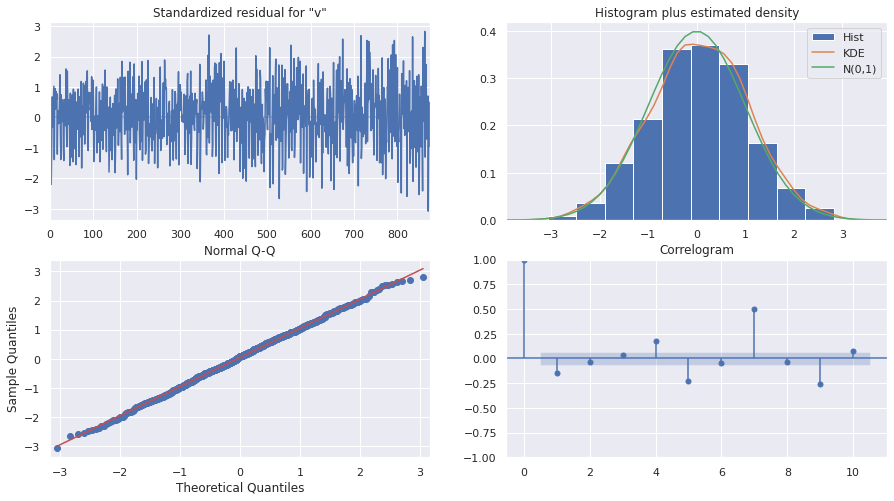

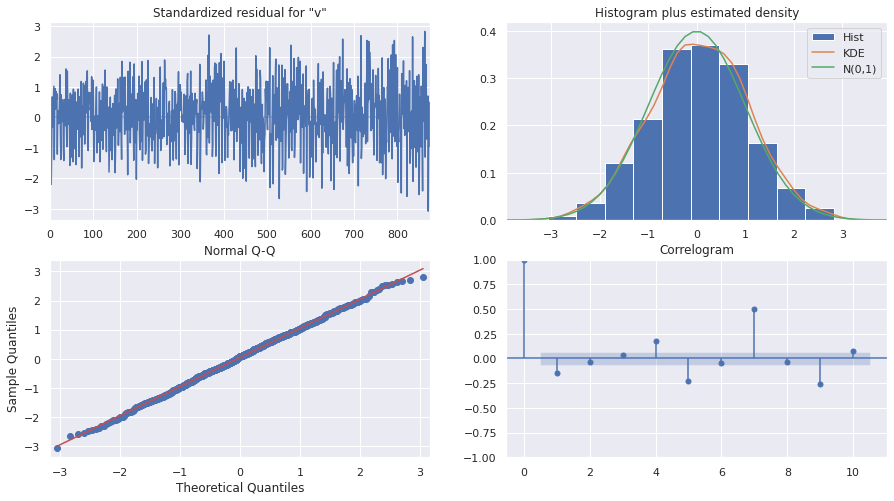

In [17]:
model_fit.plot_diagnostics()

Simple Quntiles shows that the model residuals is Linear in nature as the data points is near to the line.Histogram shows that the model residuals values is well distributed with mean near to 0.
The Correlogram has 7lag as highest point shows seasonality in the Data Model.

In [18]:
s=7
import statsmodels.api as sm
print(p,d,q)
model_new = sm.tsa.statespace.SARIMAX(Train_df['value'],order=(p,d,q),seasonal_order=(1,0,1,s),time_varying_regression=True,mle_regression=False)
result=model_new.fit(maxiter=50,method='powell')
result.summary()

4 1 1
Optimization terminated successfully.
         Current function value: 3.592845
         Iterations: 6
         Function evaluations: 570


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             value   No. Observations:                  878
Model:             SARIMAX(4, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -3154.518
Date:                           Sun, 14 May 2023   AIC                           6325.036
Time:                                   16:55:02   BIC                           6363.248
Sample:                                        0   HQIC                          6339.651
                                           - 878                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0135      0.037     -0.366      0.715      -0.086       0.059
ar.L2         -0.0192      0.035     -0.547      0.585      -0.088       0.050
ar.L3         -0.0636      0.036     -1.760      0.078      -0.134       0.007
ar.L4          0.0013      0.035      0.039      0.969      -0.067       0.070
ma.L1         -0.9407      0.015    -64.063      0.000      -0.969      -0.912
ar.S.L7        0.9994      0.001   1843.344      0.000       0.998       1.000
ma.S.L7       -0.9454      0.016    -58.515      0.000      -0.977      -0.914
sigma2        76.1338      4.823     15.785      0.000      66.681      85.587
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                23.49
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

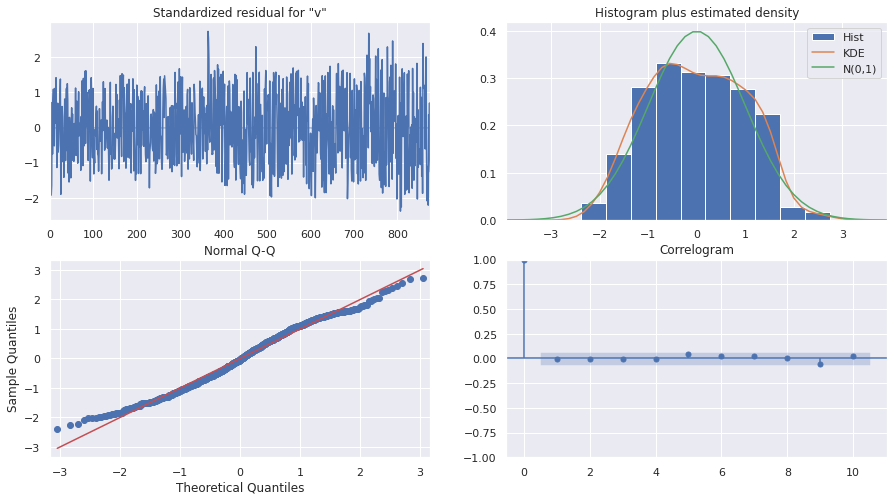

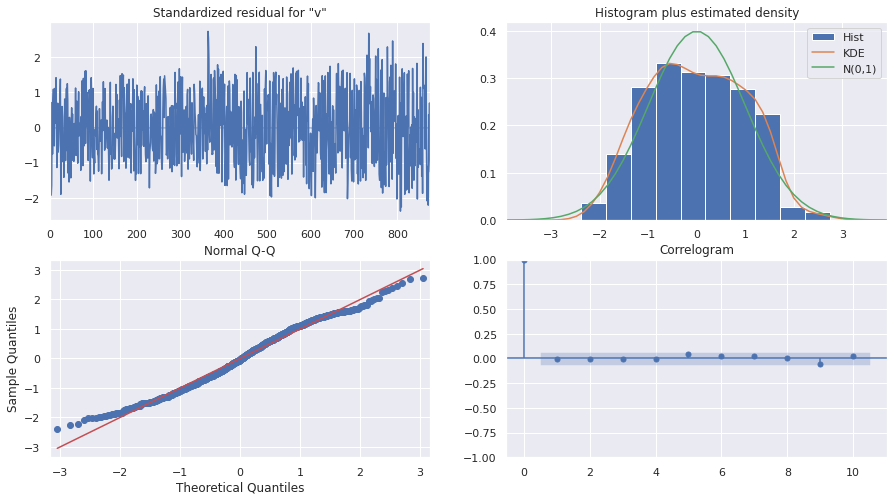

In [19]:
result.plot_diagnostics()

**Heteroskedasticity Test.**
Residuals data points are near to the line in sample Quantiles which means there no heteroskedasticity and variance in residual data points are negligible hence the model is fit as ARIMA summary is not showing Heteroskedastic data residuals.

In [20]:
Train_df['predict']=model_fit.predict(dynamic=False,typ='levels')
Train_df['Error']=Train_df['value']-Train_df['predict']
Train_df['SqErr']=np.square(Train_df['Error'])
MSE=np.round(Train_df['SqErr'].mean(),2)
print('Mean Square Error',MSE)
RMSE = np.round(np.sqrt(MSE),2)
print('Root Mean Sqaure Error',RMSE)

Mean Square Error 195.41
Root Mean Sqaure Error 13.98


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

The MSE and RMSE for Training Model without seasonality into consideration is having 195.41 and 13.98

In [21]:
Train_df['predict_Seasonal']=result.predict()
Train_df['ErrorSeasonal']=Train_df['value']-Train_df['predict_Seasonal']
Train_df['SqErrorSeasonal']=np.square(Train_df['ErrorSeasonal'])
MSESea=np.round(Train_df['SqErrorSeasonal'].mean(),2)
print('FOR Training Data set Model','\n','Mean Square Error Seasonality',MSESea)
RMSESea = np.round(np.sqrt(MSESea),2)
print('Root Mean Sqaure Error Seasonality',RMSESea)
print('Mean Square Error',MSE)
print('Root Mean Square Error',RMSE)

FOR Training Data set Model 
 Mean Square Error Seasonality 84.08
Root Mean Sqaure Error Seasonality 9.17
Mean Square Error 195.41
Root Mean Square Error 13.98


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

RMSE and MSE has improved, the errors have reduced and hence the training model is performaning better with seasonality into consideration.

In [22]:
#result1=model_fit#ARIMA Model
result1=result#SARIMAX Model
result1=result1.apply(Test_df.value,refit=False)
#Test_df['predicted1']=result1.predict()
Test_df['predicted']=result1.predict()
Test_df['ErrorSeasonal']=Test_df['value']-Test_df['predicted']
Test_df['SqErrorSeasonal']=np.square(Test_df['ErrorSeasonal'])
MSESeaTest=Test_df['SqErrorSeasonal'].mean()
print('Mean Square Error Seasonal Testing Data Set',MSESeaTest)
RMSESeaTest = np.sqrt(MSESeaTest)
print('Root Mean Sqaure Error Testing Data set',RMSESeaTest)
print('Mean Square Error Training Data Set',MSESea)
print('Root Mean Square Error Training Data set',RMSESea)
print('Mean Abosulte error for Test Data Set',np.round(result1.mae,2))
Test_df['AbsoluteError']=abs(Test_df['ErrorSeasonal'])/Test_df['value']
MAPE=Test_df['AbsoluteError'].mean()
print('Mean Absolute Percentage Error Test Data Set',np.round(MAPE*100,0),'%')

Mean Square Error Seasonal Testing Data Set 172.90917501271005
Root Mean Sqaure Error Testing Data set 13.149493336730128
Mean Square Error Training Data Set 84.08
Root Mean Square Error Training Data set 9.17
Mean Abosulte error for Test Data Set 10.32
Mean Absolute Percentage Error Test Data Set 15.0 %


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


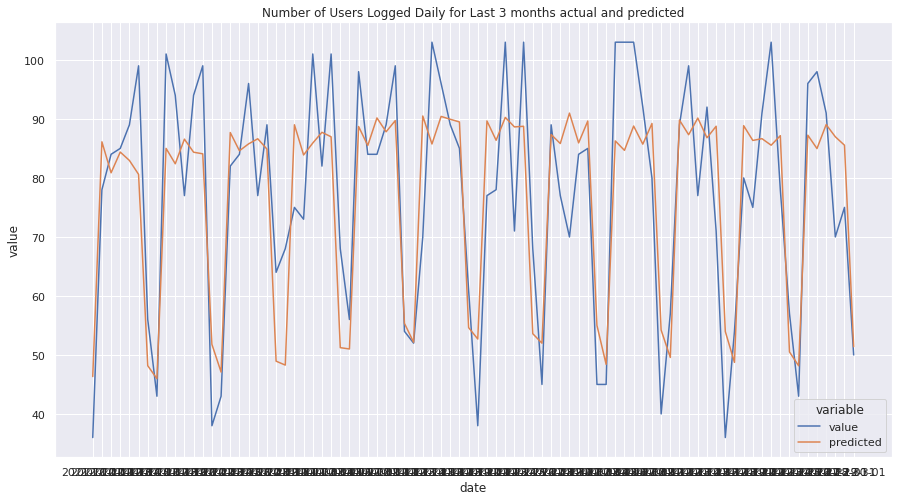

In [23]:
Test_df1=Test_df[['date','value','predicted']]
Test_df1=pd.melt(Test_df1,'date')
Test_df2=Test_df1[Test_df1['date']>='2021-10-1']
plt2=sns.lineplot(data=Test_df2,x='date',y="value",hue='variable').set(title="Number of Users Logged Daily for Last 3 months actual and predicted")

In [24]:
#Creating a forecast dataset with 60days
from datetime import timedelta
last=Test_df['date'].iloc[-1]
Test_df3=[]
days=60
Test_df3=pd.DataFrame(columns = ['date','forecast'])
forecast=result1.forecast(steps=days,dynamic=False)
for i in range(days):
    o=i+1
    Test_df3=Test_df3.append({'date':pd.to_datetime(last,format='%Y-%m-%d')+timedelta(days=o),'forecast':forecast.iloc[i]},ignore_index=True)
Test_df_FOR=Test_df[Test_df['date']>='2021-10-1']
Test_df_FOR=Test_df_FOR[['date','value']]
Test_df_FOR=pd.concat([Test_df_FOR,Test_df3])
Test_df_FOR=Test_df_FOR.reset_index(drop=True)
Test_df_FOR['date']=pd.to_datetime(Test_df_FOR['date']).dt.date
Test_df_FOR1=pd.melt(Test_df_FOR,'date')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


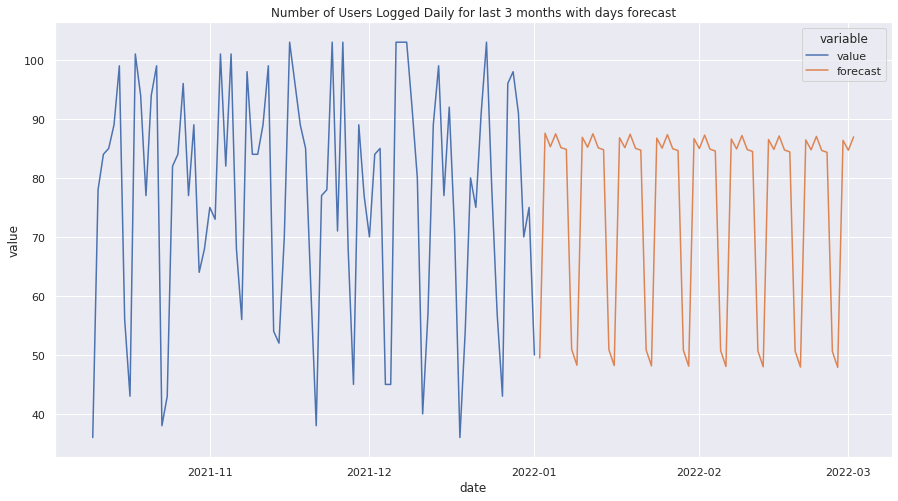

In [25]:
plt4=sns.lineplot(data=Test_df_FOR1,x='date',y="value",hue='variable').set(title="Number of Users Logged Daily for last 3 months with days forecast")